# 이동평균과 지수평활

In [1]:
import zipfile
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

In [1]:
# 아무 데이터나 가져와 사용
url = 'Bike-Sharing-Dataset.zip'
zf = zipfile.ZipFile(url)
df = pd.read_csv(zf.open('day.csv'))

In [2]:
from matplotlib import font_manager,rc
import platform

if platform.system() == 'Windows':
    path = 'c:/windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family = font_name)
elif platform.system() == 'Darwin':
    rc('font',family = 'AppleGothic')
else:
    print('Check your OS system')
matplotlib.rcParams['axes.unicode_minus'] = False

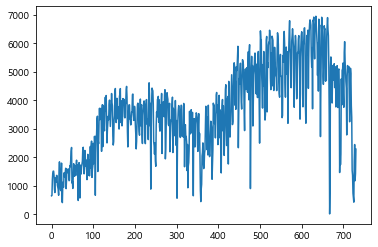

In [3]:
df['registered'].plot()

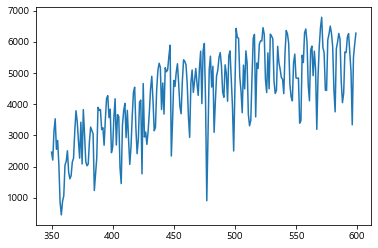

In [4]:
# 시계열성이 존재한다고 여겨지는 부분을 슬라이스
df.iloc[350:600]['registered'].plot()

In [5]:
data = df.iloc[350:600]['registered'].reset_index(drop=True)

## 이동평균

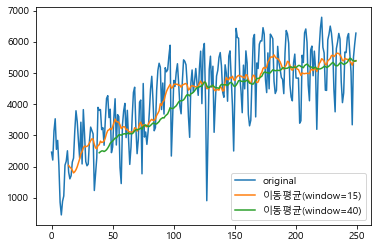

In [12]:
# window 크기 = 30
data.plot()
data.rolling(window=15).mean().plot()
data.rolling(window=40).mean().plot()
plt.legend(['original','이동평균(window=15)','이동평균(window=40)'])

## 이중 이동평균

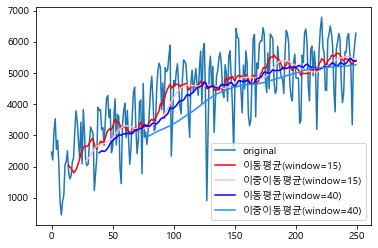

In [18]:
data.plot()
data.rolling(window=15).mean().plot(color='red')
data.rolling(window=15).mean().rolling(window=15).mean().plot(color='pink')
data.rolling(window=40).mean().plot(color='blue')
data.rolling(window=40).mean().rolling(window=40).mean().plot(color='dodgerblue')
plt.legend(['original','이동평균(window=15)','이중이동평균(window=15)','이동평균(window=40)','이중이동평균(window=40)'])


## 이중 이동평균을 이용한 예측

In [54]:
def predict(data,time,step,window_size):
    ma = data.rolling(window=window_size).mean()[time-1]
    ma_2 = data.rolling(window=window_size).mean().rolling(window=window_size).mean()[time-1]
    b_hat = (2/window_size)*(ma-ma_2)
    pred = 2*ma - ma_2 + step*b_hat
    return pred

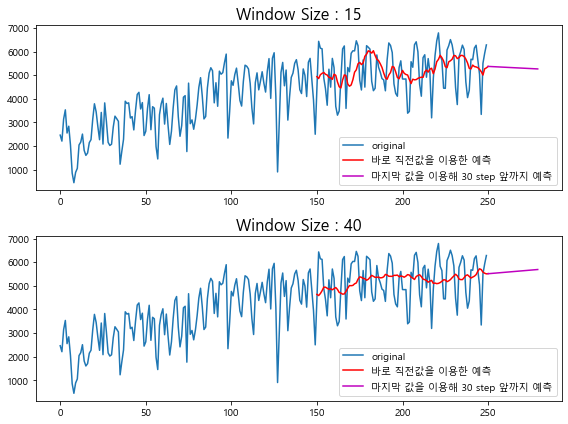

In [55]:
# 바로 직전값을 이용한 예측
fig,axes = plt.subplots(2,1,figsize=(8,6))

for ax,window_size in zip(axes,[15,40]):
    ax.plot(data)
    data_pred = []
    start = 150
    for st in range(start,start+101):
        data_pred.append(predict(data,st,1,window_size=window_size))
    ax.plot(range(start,start+101),data_pred,color='red')

    # 마지막 값을 이용해 30 step 앞까지 예측
    data_pred2 = []
    for i in range(30):
        data_pred2.append(predict(data,250,i,window_size=window_size))
    ax.plot(range(250,280),data_pred2, color='m')
    ax.legend(['original','바로 직전값을 이용한 예측','마지막 값을 이용해 30 step 앞까지 예측'])
    ax.set_title(f'Window Size : {window_size}',fontsize=16)
plt.tight_layout()

## 이중 지수평활을 이용한 예측
(지수평활 자체를 그리는 것은 생략)

In [51]:
def predict(data,time,step,alpha):
    ewm = data.ewm(alpha=alpha).mean()[time-1]
    ewm_2 = data.ewm(alpha=alpha).mean().ewm(alpha=alpha).mean()[time-1]
    b_hat = (alpha/(1-alpha))*(ewm-ewm_2)
    pred = 2*ewm - ewm_2 + step*b_hat
    return pred

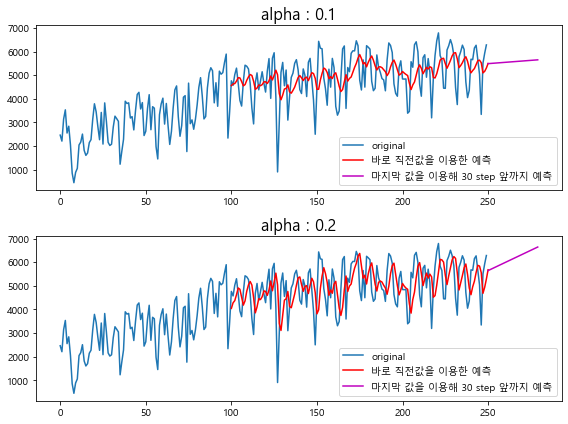

In [53]:
# 바로 직전값을 이용한 예측
fig,axes = plt.subplots(2,1,figsize=(8,6))

for ax,alpha in zip(axes,[0.1,0.2]):
    ax.plot(data)
    data_pred = []
    start = 100
    for st in range(start,start+151):
        data_pred.append(predict(data,st,1,alpha=alpha))
    ax.plot(range(start,start+151),data_pred,color='red')

    # 마지막 값을 이용해 30 step 앞까지 예측
    data_pred2 = []
    for i in range(30):
        data_pred2.append(predict(data,250,i,alpha=alpha))
    ax.plot(range(250,280),data_pred2, color='m')
    ax.legend(['original','바로 직전값을 이용한 예측','마지막 값을 이용해 30 step 앞까지 예측'])
    ax.set_title(f'alpha : {alpha}',fontsize=16)
plt.tight_layout()